In [1]:
import numpy as np 
import pandas as pd
import dateutil
import matplotlib.pyplot as plt
import seaborn as sns
import random

df = pd.read_csv('covid_19_data.csv')

In [2]:
df1 = df[df['Country/Region']=='Mainland China']

In [3]:
df1.shape

(1703, 8)

In [4]:
df1['ObservationDate'] = pd.to_datetime(df1['ObservationDate'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
df_China = df1[{"ObservationDate","Confirmed","Deaths","Recovered"}]

In [6]:
df_China.isnull().sum()

Deaths             0
Confirmed          0
ObservationDate    0
Recovered          0
dtype: int64

In [7]:
nday = df_China['Confirmed'].values.shape[0]
nday

1703

In [8]:
num_death = df_China['Deaths'].values
num_confirmed = df_China['Confirmed'].values
num_recovered = df_China['Recovered'].values

In [9]:
infect_daily = num_confirmed - num_recovered - num_death


In [10]:
df1['datetime'] = pd.to_datetime(df_China.ObservationDate)
df1.index = df1['datetime']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df2 = df1.resample('D').sum()
inf_con = df2['Confirmed']
inf_re = df2['Recovered']
inf_dead = df2['Deaths']
inf = inf_con.values - inf_re.values - inf_dead.values


In [12]:
actual_confirm = inf
actual_red = inf_re.values + inf_dead.values

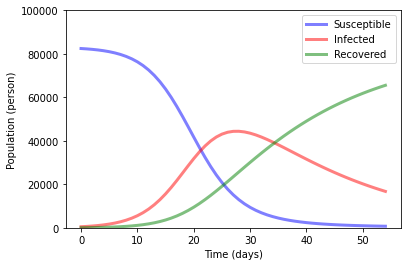

In [13]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 83000

# Initial number of infected and recovered individuals.
I0, R0 = 500, 50

# Assume S + I + R = N
S0 = N - I0 - R0

# beta is infection rate, gamma is recovery rate, (unit 1/days).

beta = 0.3
gamma = 0.05

# Discretize time 160 days 
t = np.linspace(0, 54, 55)

# Define SIR model.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta*S*I / N
    dIdt =  beta*S*I / N - gamma*I
    dRdt =  gamma*I
    return dSdt, dIdt, dRdt

# Set Initial values in term of vector
y0 = S0, I0, R0

# Integrate the ODE system using builtin odeint
result1 = odeint(deriv, y0, t, args=(N, beta, gamma))

# Get the numerical results over time
S1, I1, R1 = result1.T

# Visualization
plt.plot(t, S1, 'b', alpha=0.5, lw=3, label='Susceptible')
plt.plot(t, I1, 'r', alpha=0.5, lw=3, label='Infected')
plt.plot(t, R1, 'g', alpha=0.5, lw=3, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Population (person)')
plt.ylim(0,100000)
legend = plt.legend()
legend.get_frame().set_alpha(0.8)
#plt.savefig('SIR.eps', bbox_inches='tight')
plt.show()


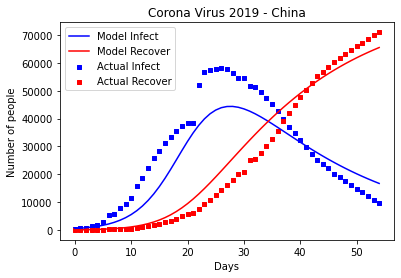

R0 =  5.999999999999999


In [14]:
x = range(55)
y = inf
z = actual_red

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, y, s=10, c='b', marker="s", label='Actual Infect')
ax1.plot(t,I1,'-b', label='Model Infect')

ax1.scatter(x, z, s=10, c='r', marker="s", label='Actual Recover')
ax1.plot(t,R1,'-r', label='Model Recover')

ax1.set(xlabel="Days",
       ylabel="Number of people",
       title="Corona Virus 2019 - China")

plt.legend(loc='upper left');
plt.show()

print('R0 = ',beta/gamma)

5
Mininum beta, gamma, delay1, delay2 =  2.110840163057344 0.0433617322611637 13 5


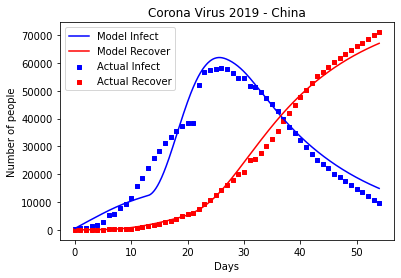

In [15]:
# https://pypi.org/project/ddeint/

from pylab import array, linspace, subplots
from ddeint import ddeint

from random import seed
from random import random

nstep = 10  # number steps of Monte Carlo simulation

def model(Y, t, d1, d2, beta, gamma):
    x, y, z = Y(t)
    xd, yd, zd = Y(t - d1)
    xdd, ydd, zdd = Y(t - d2)
    return array([-beta*x*yd, beta*x*yd - gamma*ydd, gamma*ydd])

N = 82000
S0 = 81408
I0 = 547
R0 = 45

g = lambda t: array([S0/N, I0/N, R0/N])
tt = linspace(0, 54, 541)
              

rmse_inf_percent = [] 
beta = []
gamma = []
delay = []
delay_re = []

for i in range(nstep):
    value1 = random() 
    value2 = random()
    value3 = random()
    value4 = random() 

    #scaled = minv + (value * (maxv - minv))

    betar = 1.7 + (value1 * (2.4 - 1.7))   
    gammar = 0.03 + (value2 * (0.08 - 0.013))  
    delayr = round(7 + (value3 * (14 - 7)))  
    delayre = round(1 + (value4 * (7 - 1))) 
    
    yy = ddeint(model, g, tt, fargs=(delayr,delayre,betar,gammar))

    Ia = []
    for j in range(0,55):
        ii = j*10
        Ia.append(N*yy[ii,1])

    
    rmse_inf = np.sqrt(sum(np.power(np.abs(inf-Ia),2))/len(inf))
    rmse_inf_percent.append((rmse_inf/N)*100)
    
    beta.append(betar)
    gamma.append(gammar)
    delay.append(delayr)
    delay_re.append(delayre)

index_min = np.argmin(rmse_inf_percent)
print(index_min)
print('Mininum beta, gamma, delay1, delay2 = ',beta[index_min], gamma[index_min], delay[index_min], delay_re[index_min])

    
# Final results    
yf = ddeint(model, g, tt, fargs=(delay[index_min],delay_re[index_min], beta[index_min], gamma[index_min]))    

x = range(55)
y = inf
z = actual_red

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, y, s=10, c='b', marker="s", label='Actual Infect')
ax1.plot(tt,N*yf[:,1],'-b', label='Model Infect')

ax1.scatter(x, z, s=10, c='r', marker="s", label='Actual Recover')
ax1.plot(tt,N*yf[:,2],'-r', label='Model Recover')

ax1.set(xlabel="Days",
       ylabel="Number of people",
       title="Corona Virus 2019 - China")

plt.legend(loc='upper left');
plt.show()


bb = beta[index_min]
gg = gamma[index_min]
d1 = delay[index_min]
d2 = delay_re[index_min]



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


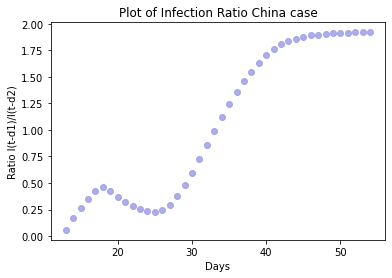

In [16]:
import numpy as np
import matplotlib.pyplot as plt

colors = (0.6,0.6,0.9)

nd = len(Ia)

ts = []
Ratio = []

for i in range(d1,nd):
    Ratio.append(Ia[i-d1]/Ia[i-d2])
    ts.append(i)

plt.scatter(ts,Ratio, c=colors, alpha=0.8)   
plt.title('Plot of Infection Ratio China case')
plt.xlabel('Days')
plt.ylabel('Ratio I(t-d1)/I(t-d2)')
plt.show()